In [6]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
oil_prices = pd.read_csv('oil.csv')

In [8]:
oil_prices.tail()

,Year,Oil prices in constant 1997 dollars. 1870-1997
123,1993,17.15
124,1994,18.27
125,1995,19.40
126,1996,20.52
127,Oil prices in constant 1997 dollars. 1870-1997,NaN


# 清洗和转换
最后一行是脚注，而不是我们需要的数据，需要删除

In [9]:
oil_prices = oil_prices[~np.isnan(oil_prices[oil_prices.columns[1]])]

In [10]:
oil_prices.tail()

,Year,Oil prices in constant 1997 dollars. 1870-1997
122,1992,18.38
123,1993,17.15
124,1994,18.27
125,1995,19.40
126,1996,20.52


In [11]:
oil_prices.dtypes

Year                                               object
Oil prices in constant 1997 dollars. 1870-1997    float64
dtype: object

## `convert_objects` 进行数据转换

In [12]:
oil_prices = oil_prices.convert_objects(convert_dates='coerce')  # 转换为时间序列数据

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


## `rename` 对列名进行重命名

In [14]:
oil_prices.rename(columns = {oil_prices.columns[1]: 'Oil_Price_1997_Dollars'},inplace=True)

In [15]:
oil_prices.head()

,Year,Oil_Price_1997_Dollars
0,1870-01-01,58.53
1,1871-01-01,49.09
2,1872-01-01,24.68
3,1873-01-01,16.71
4,1874-01-01,19.86


In [16]:
oil_prices.dtypes

Year                      datetime64[ns]
Oil_Price_1997_Dollars           float64
dtype: object

# 时间序列诊断

In [17]:
matplotlib.style.use('ggplot')

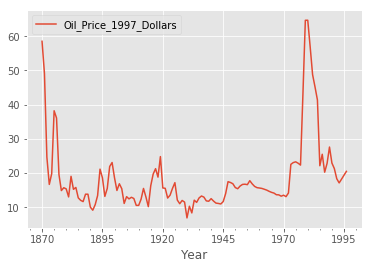

In [18]:
oil_prices.plot(x='Year',y='Oil_Price_1997_Dollars')

## `lag_plot` 对相关度进行度量分析

`lag plot`(延迟图)只是简单地把每年的石油价格绘制在横坐标上，把次年的石油价格绘制在纵坐标上。如果没有相关性，在图上我们将会看到一个环形的云。

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


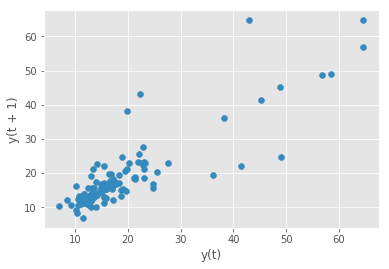

In [19]:
from pandas.tools.plotting import lag_plot

lag_plot(oil_prices.Oil_Price_1997_Dollars)

## 自相关图
探索上面的相关性是否如我们预期的一样？

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


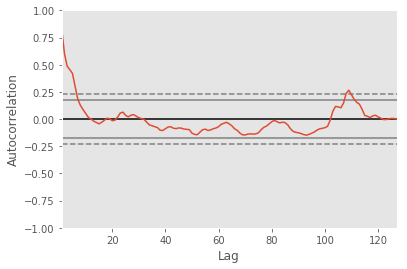

In [20]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(oil_prices['Oil_Price_1997_Dollars'])

上图显示了数据点之间在不同的延迟度（年度之间的差异）上的相关性，同时也显示了对于随机数据之中所与其的相关性的 $95\%$ 置信区间（实线）和 $99\%$ 的置信区间（虚线）。由此我们可以看出，对于小于 $10$ 年的延迟，数据之间有很强的相关性。

# 连接信号和相关性

In [21]:
car_crashes=pd.read_csv("car_crashes.csv")
car_crashes.Year=car_crashes.Year.astype(str)
car_crashes=car_crashes.convert_objects(convert_dates='coerce')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
car_crashes.head()

,Year,Car_Crash_Fatalities_US
0,1900-01-01,36
1,1901-01-01,54
2,1902-01-01,79
3,1903-01-01,117
4,1904-01-01,172


In [23]:
car_crashes['Car_Crash_Fatalities_US']=car_crashes['Car_Crash_Fatalities_US']/1000

## `pd.merge` 合并数据
通过 `on` 变量指定列，以便将不同数据集中的行进行匹配：

In [24]:
oil_prices_car_crashes = pd.merge(oil_prices,car_crashes,on='Year')

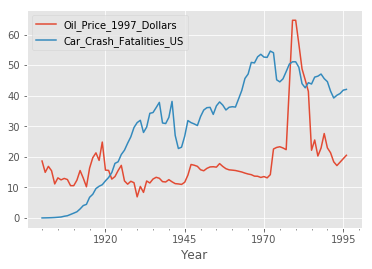

In [25]:
oil_prices_car_crashes.plot(x='Year')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


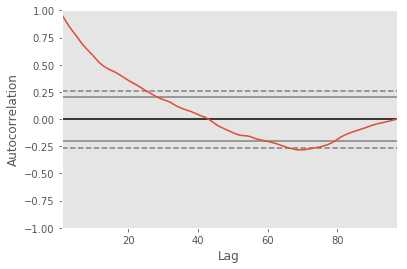

In [26]:
autocorrelation_plot(oil_prices_car_crashes[['Car_Crash_Fatalities_US','Oil_Price_1997_Dollars']])

由此看来，在大约 $20$ 年或者更短的范围内，相关性是超过了预期波动的，这个范围要比仅仅通过石油价格所表现出来的相关性要大的多。